<h2 style="color:darkred;font-size:30px">Projet 4 : Segmentez des clients d'un site e-commerce</h2>

<img src="images\olist.png" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 2 : Modélisation (Hybride)</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1 ____ Nettoyage ________________________________________________________________
    
    Notebook 2 ____ Modélisation (Machine Learning) __________________________________________
    6. Preprocessing
        6.1 Standardisation
        6.2 Réduction dimensionnelle (ACP)
    7. K-Means (avec les catégories des produits)
        7.1 Evaluation et optimisation
        7.2 Visualisation et interprétation des clusters

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30,
        }

In [3]:
# lire le fichier csv data_clean
olist_data = pd.read_csv('data/olist_data_clean.csv', index_col ='customer_unique_id')
print('Le jeu des données olist_data compte {} colonnes et {} lignes.'.format(olist_data.shape[1],
                                                                                  olist_data.shape[0]))

Le jeu des données olist_data compte 28 colonnes et 96093 lignes.


In [4]:
# Remise en forme les datatypes

liste = list(olist_data.columns)
liste.remove('last_purchase')
liste
for column in liste:
    olist_data[column] = olist_data[column].astype('Int64')
    
olist_data['last_purchase'] = olist_data['last_purchase'].astype('datetime64[ns]')

In [5]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96093 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   anciennete_du_client    96093 non-null  Int64         
 1   last_purchase           96093 non-null  datetime64[ns]
 2   date_derniere_commande  96093 non-null  Int64         
 3   nb_commandes            96093 non-null  Int64         
 4   nb_payements            96093 non-null  Int64         
 5   nb_produit              96093 non-null  Int64         
 6   depense_total           96093 non-null  Int64         
 7   review_score_min        96093 non-null  Int64         
 8   montant_commande_max    96093 non-null  Int64         
 9   montant_produit_max     95419 non-null  Int64         
 10  frais_de_port_moy       95419 non-null  Int64         
 11  delai_livraison_max     93355 non-null  Int64        

In [6]:
data = olist_data.drop(['last_purchase'], axis=1)

In [7]:
data.drop(['maison_gift_beauty', 'technologie',
       'maison_exterior', 'books_media', 'foods_beverages', 'sports',
       'industry', 'office_furniture'], axis=1, inplace=True)

# data.drop(['distance'], axis=1, inplace=True)

# data.drop(['date_derniere_commande', 'montant_produit_max'], axis=1, inplace=True)

In [8]:
# Enlevons toutes les valeurs manquantes

data.dropna(how='any', inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92889 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anciennete_du_client    92889 non-null  Int64
 1   date_derniere_commande  92889 non-null  Int64
 2   nb_commandes            92889 non-null  Int64
 3   nb_payements            92889 non-null  Int64
 4   nb_produit              92889 non-null  Int64
 5   depense_total           92889 non-null  Int64
 6   review_score_min        92889 non-null  Int64
 7   montant_commande_max    92889 non-null  Int64
 8   montant_produit_max     92889 non-null  Int64
 9   frais_de_port_moy       92889 non-null  Int64
 10  delai_livraison_max     92889 non-null  Int64
 11  delai_estime            92889 non-null  Int64
 12  volume_produit_max      92889 non-null  Int64
 13  densite_produit_max     92889 non-null  Int64
 14  distance         

# 6. Preprocessing

In [10]:
from sklearn import decomposition

## 6.1 Standardisation

In [11]:
X = data.values

In [12]:
from sklearn import preprocessing

In [13]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# MinMaxScaler()
# RobustScaler()

# 7. k-Means

In [14]:
from sklearn.cluster import KMeans

In [24]:
# Create a k-means clustering model
kmeans_hybride = KMeans(init='random', n_clusters=50, n_init=10)
# We will ask for 8 clusters (the  n_clusters  parameter) and
# ask for clustering to be performed 10 times,
# starting with different centroids (this is the  n_init  parameter)

# Fit the data to the model
kmeans_hybride.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters_hybride =  kmeans_hybride.predict(X_scaled)

In [25]:
# Add the cluster number to the original scaled data
X_clustered_hybride = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
X_clustered_hybride["cluster"] = clusters_hybride

In [26]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

In [27]:
kmeans_hybride.cluster_centers_

array([[-9.95379043e-02, -8.15214350e-02, -1.64174094e-01,
         1.32107883e+00,  2.71057145e+00,  5.10229946e-01,
        -5.55838873e-01,  2.55500147e-01, -1.70178039e-01,
        -2.14756502e-01, -3.12804973e-01, -3.22324205e-01,
        -1.19828046e-02,  3.91586152e-02, -1.57080426e-01,
        -4.21472737e-01,  5.01085203e-01, -1.26039525e-01,
        -1.89751442e-01],
       [-1.56789504e-01, -1.39074242e-01, -1.59707549e-01,
        -1.49236080e-01, -1.81097719e-01, -8.13967135e-02,
        -2.20139181e+00, -9.60694989e-02, -7.87543491e-02,
        -1.03024211e-01,  2.00198174e+00,  1.88175798e+00,
        -6.46039764e-02, -8.84005909e-03, -7.03794409e-02,
        -4.99831619e-01,  5.68542689e-01, -1.26039525e-01,
        -1.70259518e-01],
       [ 3.39210625e-01,  3.31240658e-01,  1.76906788e-02,
         7.03280462e-02,  1.30869004e-01,  4.69657562e-02,
        -5.05747298e-02,  8.78568951e-02,  4.54403229e-02,
         3.10703393e-01,  7.39762160e-02,  5.45564366e-02,
    

In [28]:
# Add the cluster number to the original scaled data
X_centroids = pd.DataFrame(kmeans_hybride.cluster_centers_, columns=[i for i in range(0,19)])

In [29]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(X_centroids) 
np.bincount(clusters) # count of data points in each cluster

array([48,  1,  1])

In [30]:
from scipy.cluster.hierarchy import dendrogram

In [31]:
def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

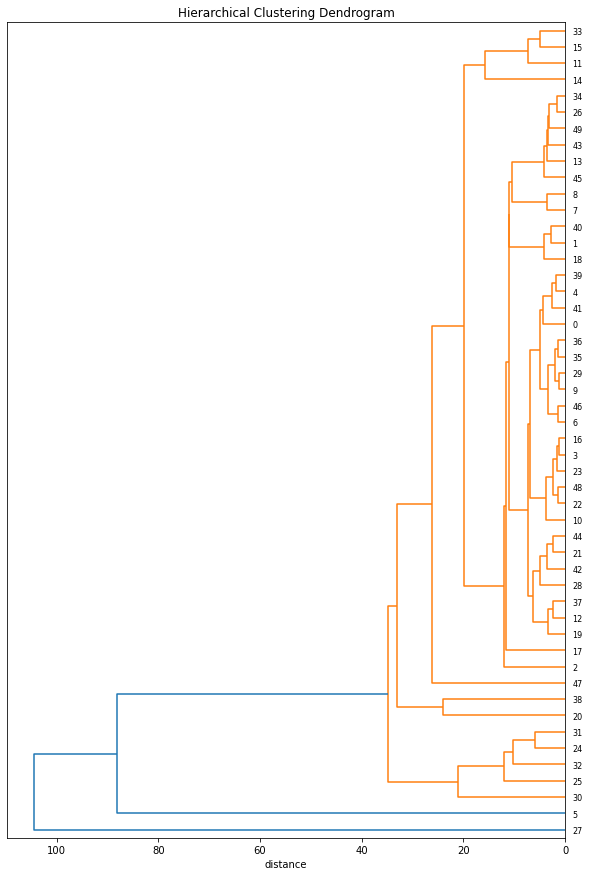

In [32]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X_centroids, 'ward')

names = X_centroids.index

plot_dendrogram(Z, names, figsize=(10,15))